In [78]:
import os
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Define root path for the Project directory
root_path = '/Users/mb6477/Desktop/ProbMod_project/COS-513-Group-Project/'

# Download SVI county data
df_list_svi = []
data_years = [2000, 2010, 2014, 2016, 2018, 2020, 2022]
svi_path = os.path.join(root_path, 'data/SVI_County_Data/')

for yr in data_years:
    # read data
    print(yr)
    svi_path = os.path.join(root_path, 'data/SVI_County_Data/')
    filename = os.path.join(svi_path, 'SVI_' + str(yr) + '_US_county.csv')
    df = pd.read_csv(filename)

    # clean data
    df = df.replace(-999., np.nan) # nan values are labelled -999
    if yr == 2000:
        df = df.rename(columns={'USTP': 'RPL_THEMES', 'STATE_NAME': 'STATE', 'STCOFIPS': 'FIPS'})
    if yr == 2010:
        df = df.rename(columns={'R_PL_THEMES': 'RPL_THEMES', 'STATE_NAME': 'STATE'})

    df.FIPS = df.FIPS.astype(int).astype(str).str.zfill(5)
    df['STATE_FIPS'] = df.FIPS.apply(lambda x: x[:2])
    df['CZ_FIPS'] = df.FIPS.apply(lambda x: x[2:])
    df['Year'] = yr
    df_list_svi.append(df)

df_svi = pd.concat(df_list_svi)
df_svi = df_svi.reset_index()

2000
2010
2014
2016
2018
2020
2022


In [14]:
df_svi.head()

index STATE_FIPS  CNTY_FIPS   FIPS    STATE STATE_ABBR    COUNTY   G1V1R  \
0      0         01        1.0  01001  Alabama         AL  Autauga   0.1092   
1      1         01        3.0  01003  Alabama         AL  Baldwin   0.1015   
2      2         01        5.0  01005  Alabama         AL  Barbour   0.2680   
3      3         01        7.0  01007  Alabama         AL     Bibb   0.2061   
4      4         01        9.0  01009  Alabama         AL   Blount   0.1174   

    G1V2R    G1V3R  ...  EP_ASIAN  MP_ASIAN  EP_AIAN  MP_AIAN  EP_NHPI  \
0  0.0310  18518.0  ...       NaN       NaN      NaN      NaN      NaN   
1  0.0255  20826.0  ...       NaN       NaN      NaN      NaN      NaN   
2  0.0271  13316.0  ...       NaN       NaN      NaN      NaN      NaN   
3  0.0329  14105.0  ...       NaN       NaN      NaN      NaN      NaN   
4  0.0293  16325.0  ...       NaN       NaN      NaN      NaN      NaN   

   MP_NHPI  EP_TWOMORE  MP_TWOMORE  EP_OTHERRACE  MP_OTHERRACE  
0      NaN         NaN         NaN           NaN           NaN  
1      NaN         NaN         NaN           NaN           NaN  
2      NaN         NaN         NaN           NaN           NaN  
3      NaN         NaN         NaN           NaN           NaN  
4      NaN         NaN         NaN           NaN           NaN  

[5 rows x 325 columns]

In [18]:
#df_svi.columns.tolist()

In [53]:
# Calculate percent complete for each column
percent_complete = df_svi.notnull().mean() * 100
percent_complete = percent_complete.sort_values(ascending=False)

# Set display options to show all rows
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(percent_complete)


In [33]:
# Identify columns with >= 70% complete data
cols_70 = percent_complete[percent_complete >= 70].index.tolist()

# Identify columns that start with 'RPL_'
cols_rpl = [col for col in df_svi.columns if col.startswith('RPL_')]

# Combine both lists and remove duplicates
cols_keep = list(set(cols_70 + cols_rpl + ['Year']))
df_svi_filtered = df_svi[cols_keep]

# Print the columns
print(df_svi_filtered.columns.tolist())

['ST', 'M_NOHSDP', 'AREA_SQMI', 'EP_SNGPNT', 'EP_UNINSUR', 'EP_CROWD', 'EP_MOBILE', 'EPL_MUNIT', 'M_SNGPNT', 'MP_MINRTY', 'EP_GROUPQ', 'E_NOVEH', 'M_UNINSUR', 'EPL_NOHSDP', 'M_AGE65', 'RPL_THEME3', 'FIPS', 'MP_MOBILE', 'E_LIMENG', 'COUNTY', 'EP_AGE17', 'EP_NOVEH', 'E_MINRTY', 'STATE', 'M_CROWD', 'RPL_THEME1', 'F_SNGPNT', 'Year', 'M_TOTPOP', 'F_THEME1', 'M_HH', 'ST_ABBR', 'M_NOVEH', 'SPL_THEME3', 'E_GROUPQ', 'F_AGE17', 'F_THEME4', 'E_AGE17', 'E_UNEMP', 'F_AGE65', 'MP_LIMENG', 'M_UNEMP', 'MP_NOVEH', 'EP_NOHSDP', 'EP_MUNIT', 'M_MOBILE', 'EPL_DISABL', 'MP_UNEMP', 'E_CROWD', 'E_NOHSDP', 'MP_AGE65', 'SPL_THEME1', 'EPL_MOBILE', 'EP_UNEMP', 'RPL_THEMES', 'F_NOVEH', 'E_HU', 'RPL_THEME2', 'E_DAYPOP', 'EP_DISABL', 'EPL_NOVEH', 'RPL_THEME4', 'EPL_SNGPNT', 'E_AGE65', 'MP_AGE17', 'M_GROUPQ', 'F_CROWD', 'SPL_THEME2', 'F_MOBILE', 'E_MOBILE', 'EP_LIMENG', 'M_LIMENG', 'F_DISABL', 'E_UNINSUR', 'SPL_THEMES', 'F_GROUPQ', 'EPL_CROWD', 'M_MUNIT', 'EPL_MINRTY', 'E_SNGPNT', 'EP_MINRTY', 'M_DISABL', 'F_THEME3',

In [34]:
print(counties.columns.tolist())  # Look for state identifier like "STATEFP", "STATE", etc.

['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry']


In [35]:
states.columns.tolist()

['STATE', 'NAME', 'FIPS', 'LON', 'LAT', 'geometry']

In [36]:
climate_regions.columns.tolist()

['State',
 'Subregion',
 'STATEFP',
 'STATENS',
 'AFFGEOID',
 'GEOID',
 'STUSPS',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'geometry']

In [45]:
# Ensure FIPS is properly formatted
df_svi_filtered['FIPS'] = df_svi_filtered['FIPS'].astype(str).str.zfill(5)

# Identify columns to aggregate (exclude identifiers and non-numeric)
exclude_cols = ['index', 'STATE', 'STATE_FIPS', 'CZ_FIPS', 'COUNTY', 'STATE_ABBR', 'Year']
numeric_cols = [col for col in df_svi_filtered.columns 
                if col not in exclude_cols 
                and pd.api.types.is_numeric_dtype(df_svi_filtered[col])]

# Aggregate methods
agg_mean = df_svi_filtered.groupby('FIPS')[numeric_cols].mean().reset_index()  # Mean across years
most_recent = df_svi_filtered.sort_values('Year').groupby('FIPS').tail(1)      # Latest available year

# Preview results
print("Mean values per county:")
print(agg_mean[['FIPS'] + [col for col in agg_mean.columns if col.startswith('RPL_')]].head())

print("\nMost recent values per county:")
print(most_recent[['FIPS', 'Year'] + [col for col in most_recent.columns if col.startswith('RPL_')]].head())


Mean values per county:
    FIPS  RPL_THEME3  RPL_THEME1  RPL_THEMES  RPL_THEME2  RPL_THEME4
0  01001     0.59200     0.34558    0.407914     0.55604     0.36778
1  01003     0.51704     0.30342    0.326657     0.24930     0.35682
2  01005     0.87834     0.96284    0.980671     0.90070     0.96396
3  01007     0.54110     0.80378    0.716371     0.31278     0.71114
4  01009     0.52096     0.65446    0.514986     0.58318     0.22812

Most recent values per county:
       FIPS  Year  RPL_THEME3  RPL_THEME1  RPL_THEMES  RPL_THEME2  RPL_THEME4
2918  51560  2000         NaN         NaN      0.7885         NaN         NaN
85    02201  2000         NaN         NaN      0.6382         NaN         NaN
87    02232  2000         NaN         NaN      0.4601         NaN         NaN
91    02280  2000         NaN         NaN      0.4987         NaN         NaN
2916  51515  2010         NaN         NaN      0.5817         NaN         NaN


In [54]:
# Identify RPL columns
rpl_cols = [col for col in df_svi_filtered.columns if col.startswith('RPL_')]

# Prepare for interpolation
years_full = list(range(2000, 2023))
pivoted_dict = {}

for col in rpl_cols:
    pivoted = df_svi_filtered.pivot(index='Year', columns='FIPS', values=col)
    pivoted = pivoted.reindex(years_full)
    interpolated = pivoted.interpolate(method='linear', limit_direction='both')
    pivoted_dict[col] = interpolated

# Combine interpolated data
interpolated_df = pd.concat(pivoted_dict, axis=1)
interpolated_df.columns = interpolated_df.columns.get_level_values(0) + '_' + interpolated_df.columns.get_level_values(1)
interpolated_df = interpolated_df.reset_index()

# Convert to long format
long_dfs = []
for col in rpl_cols:
    temp_df = interpolated_df[['Year'] + [c for c in interpolated_df.columns if c.startswith(col + '_')]].copy()
    temp_df = temp_df.melt(id_vars='Year', var_name='FIPS', value_name=col)
    temp_df['FIPS'] = temp_df['FIPS'].str.replace(col + '_', '')
    long_dfs.append(temp_df)

svi_yearly = reduce(lambda left, right: pd.merge(left, right, on=['Year', 'FIPS']), long_dfs)
svi_yearly['FIPS'] = svi_yearly['FIPS'].astype(str).str.zfill(5)


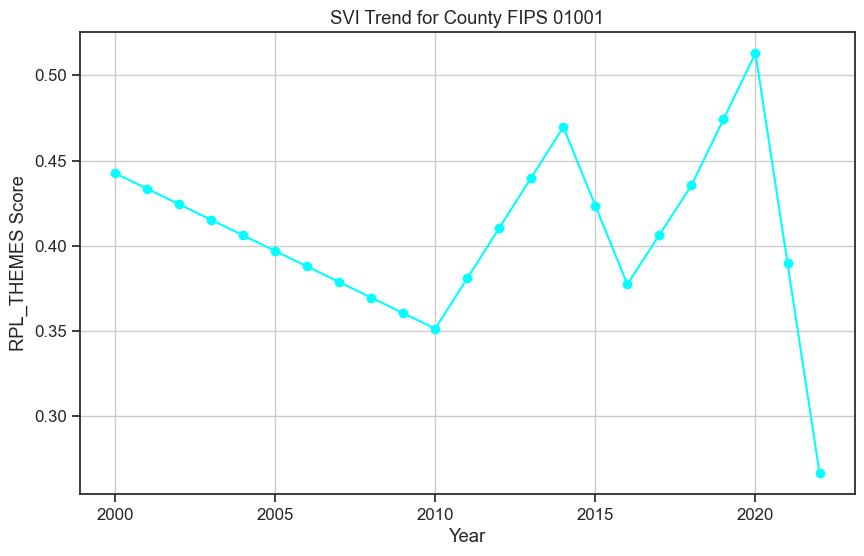

In [55]:
import matplotlib.pyplot as plt

county_fips = '01001'  # Example FIPS
county_data = svi_yearly[svi_yearly['FIPS'] == county_fips]

plt.figure(figsize=(10, 6))
plt.plot(county_data['Year'], county_data['RPL_THEMES'], marker='o', color='cyan')
plt.title(f'SVI Trend for County FIPS {county_fips}')
plt.xlabel('Year')
plt.ylabel('RPL_THEMES Score')
plt.grid(True)
plt.show()


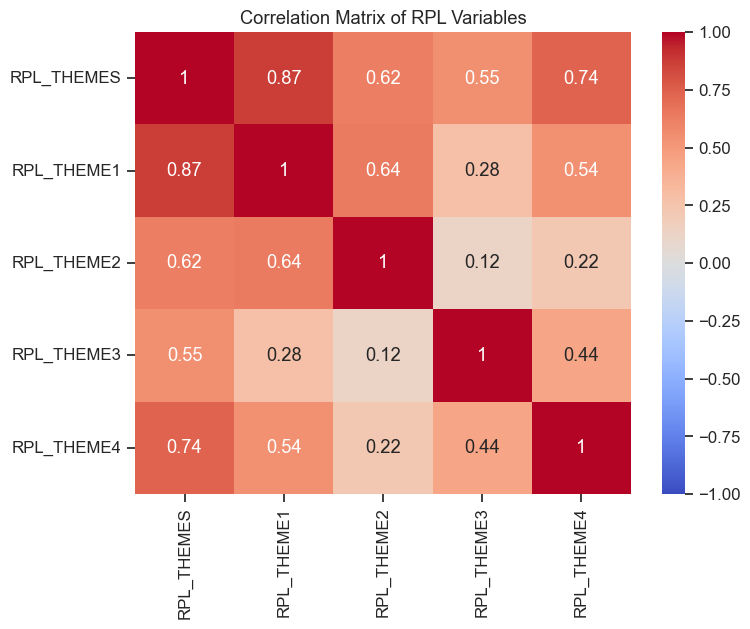

In [57]:
rpl_vars = ['RPL_THEMES', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']
corr_matrix = svi_yearly[rpl_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of RPL Variables')
plt.show()


## Combining SVI_data and Storm_data based on counties

In [61]:
# Define root path for the Project directory
root_path = '/Users/mb6477/Desktop/ProbMod_project/COS-513-Group-Project/'

# Load all NOAA storm data CSV files 
noaa_dir = os.path.join(root_path, 'data/NOAA_STORM_DATA')
df_noaa = pd.concat([pd.read_csv(os.path.join(noaa_dir, f)) for f in os.listdir(noaa_dir)])

# Remove records with missing state FIPS codes 
df_noaa = (df_noaa.dropna(subset=['STATE_FIPS', 'BEGIN_LON', 'BEGIN_LAT'])
           .assign(
               STATE_FIPS=lambda x: x['STATE_FIPS'].astype(int).astype(str).str.zfill(2),
               CZ_FIPS=lambda x: x['CZ_FIPS'].astype(int).astype(str).str.zfill(3)))

/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/3602676798.py:6: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noaa = pd.concat([pd.read_csv(os.path.join(noaa_dir, f)) for f in os.listdir(noaa_dir)])
/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/3602676798.py:6: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noaa = pd.concat([pd.read_csv(os.path.join(noaa_dir, f)) for f in os.listdir(noaa_dir)])
/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/3602676798.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noaa = pd.concat([pd.read_csv(os.path.join(noaa_dir, f)) for f in os.listdir(noaa_dir)])
/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/3602676798.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import

In [62]:
# Assuming svi_yearly is already created from the earlier interpolation code
# Make sure FIPS codes are consistently formatted
svi_yearly['FIPS'] = svi_yearly['FIPS'].astype(str).str.zfill(5)

# Create year column as integer for merging
svi_yearly['Year'] = svi_yearly['Year'].astype(int)

# Select relevant SVI variables
rpl_cols = ['RPL_THEMES', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']
svi_yearly_subset = svi_yearly[['FIPS', 'Year'] + rpl_cols]

print(f"SVI yearly data shape: {svi_yearly_subset.shape}")
print(f"Year range: {svi_yearly_subset['Year'].min()} to {svi_yearly_subset['Year'].max()}")


SVI yearly data shape: (72680, 7)
Year range: 2000 to 2022


In [63]:
# Format the storm data for merging
df_noaa['FIPS'] = df_noaa['STATE_FIPS'] + df_noaa['CZ_FIPS']
df_noaa['FIPS'] = df_noaa['FIPS'].astype(str).str.zfill(5)

# Standardize Year field for merging
df_noaa['Year'] = df_noaa['YEAR']  # Use the existing YEAR field

# Filter for selected event types
selected_events = ['Flash Flood', 'Flood', 'Heavy Rain']
df_selected = df_noaa[df_noaa['EVENT_TYPE'].isin(selected_events)]

# Count events by county, year, and event type
event_counts = (df_selected
                .groupby(['FIPS', 'Year', 'EVENT_TYPE'])
                .size()
                .reset_index(name='event_count'))

# Pivot to create columns for each event type
event_pivot = event_counts.pivot_table(
    index=['FIPS', 'Year'], 
    columns='EVENT_TYPE', 
    values='event_count',
    fill_value=0
).reset_index()

# Rename columns to remove spaces for easier access
event_pivot.columns.name = None
event_pivot = event_pivot.rename(columns={
    'Flash Flood': 'flash_flood_count',
    'Flood': 'flood_count',
    'Heavy Rain': 'heavy_rain_count'
})

# Add total flood events column
event_pivot['total_flood_events'] = (
    event_pivot['flash_flood_count'] + 
    event_pivot['flood_count'] + 
    event_pivot['heavy_rain_count']
)

print(f"Storm events data shape: {event_pivot.shape}")


Storm events data shape: (35581, 6)


In [65]:
# Merge SVI and storm event data
combined_data = pd.merge(
    svi_yearly_subset,
    event_pivot,
    on=['FIPS', 'Year'],
    how='left'
)

# Fill missing event counts with zeros
flood_cols = ['flash_flood_count', 'flood_count', 'heavy_rain_count', 'total_flood_events']
combined_data[flood_cols] = combined_data[flood_cols].fillna(0)

# Check the merged data
print(f"Combined data shape: {combined_data.shape}")
print("Sample of combined data:")
print(combined_data.head())

# Calculate correlation between SVI and flood events
corr_data = combined_data.groupby('FIPS')[rpl_cols + ['total_flood_events']].mean()
correlation = corr_data.corr()
print("\nCorrelation between SVI themes and flood events:")
print(correlation.loc['total_flood_events', rpl_cols])


Combined data shape: (72680, 11)
Sample of combined data:
    FIPS  Year  RPL_THEMES  RPL_THEME1  RPL_THEME2  RPL_THEME3  RPL_THEME4  \
0  01001  2000     0.44260      0.4145      0.5387      0.4986        0.51   
1  01001  2001     0.43346      0.4145      0.5387      0.4986        0.51   
2  01001  2002     0.42432      0.4145      0.5387      0.4986        0.51   
3  01001  2003     0.41518      0.4145      0.5387      0.4986        0.51   
4  01001  2004     0.40604      0.4145      0.5387      0.4986        0.51   

   flash_flood_count  flood_count  heavy_rain_count  total_flood_events  
0                0.0          0.0               0.0                 0.0  
1                0.0          0.0               0.0                 0.0  
2                0.0          0.0               0.0                 0.0  
3                0.0          0.0               0.0                 0.0  
4                0.0          0.0               0.0                 0.0  

Correlation between SVI them

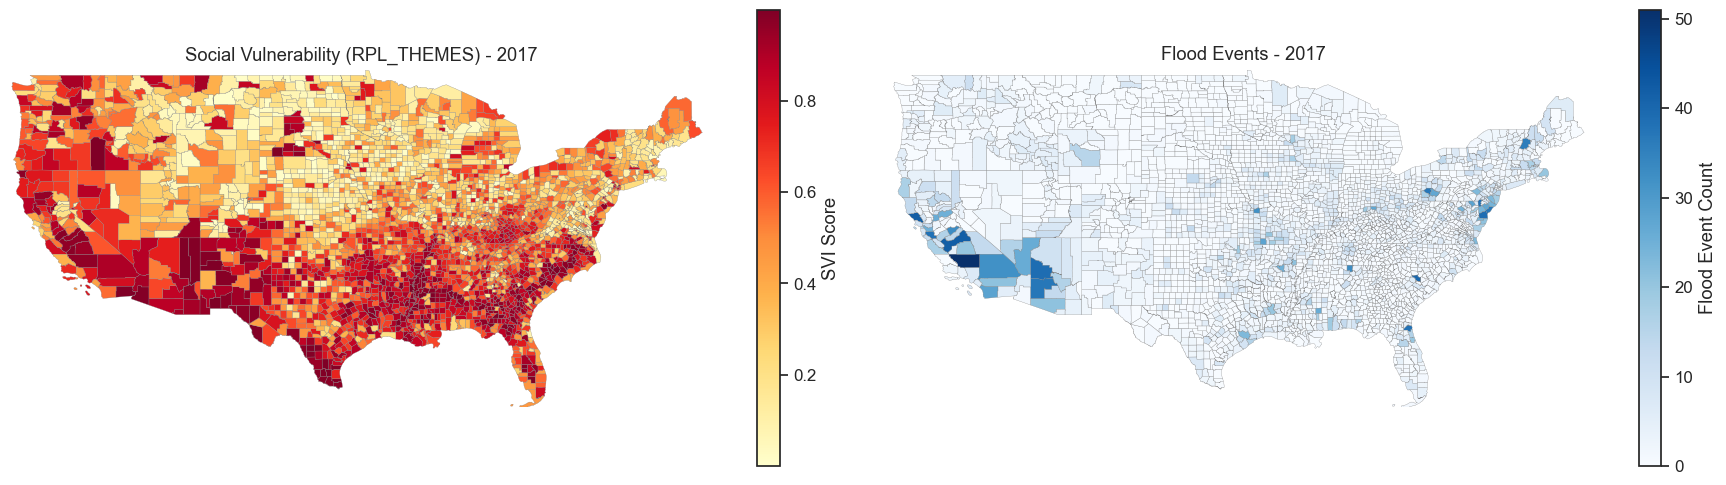

In [70]:
# Load county shapefile
county_path = os.path.join(root_path, 'data/tl_2019_us_county/tl_2019_us_county.shp')
counties = gpd.read_file(county_path)

# Format GEOID to match FIPS
counties['FIPS'] = counties['GEOID'].astype(str).str.zfill(5)
CONUS_BBOX = (-125, 24.5, -66, 49.5)

# For a specific year (e.g., 2018), create a map:
year_to_map = 2017
year_data = combined_data[combined_data['Year'] == year_to_map]

# Merge with shapefile
counties_with_data = counties.merge(
    year_data,
    on='FIPS',
    how='left'
)

# Create a two-panel figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First panel: SVI vulnerability
counties_with_data.plot(
    column='RPL_THEMES',
    cmap='YlOrRd',
    linewidth=0.2,
    edgecolor='gray',
    legend=True,
    ax=axes[0],
    legend_kwds={'shrink': 0.6, 'label': 'SVI Score'}
)
axes[0].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
axes[0].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
axes[0].set_title(f'Social Vulnerability (RPL_THEMES) - {year_to_map}')
axes[0].set_axis_off()

# Second panel: Flood events
counties_with_data.plot(
    column='total_flood_events',
    cmap='Blues',
    linewidth=0.2,
    edgecolor='gray',
    legend=True,
    ax=axes[1],
    legend_kwds={'shrink': 0.6, 'label': 'Flood Event Count'}
)
axes[1].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
axes[1].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
axes[1].set_title(f'Flood Events - {year_to_map}')
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


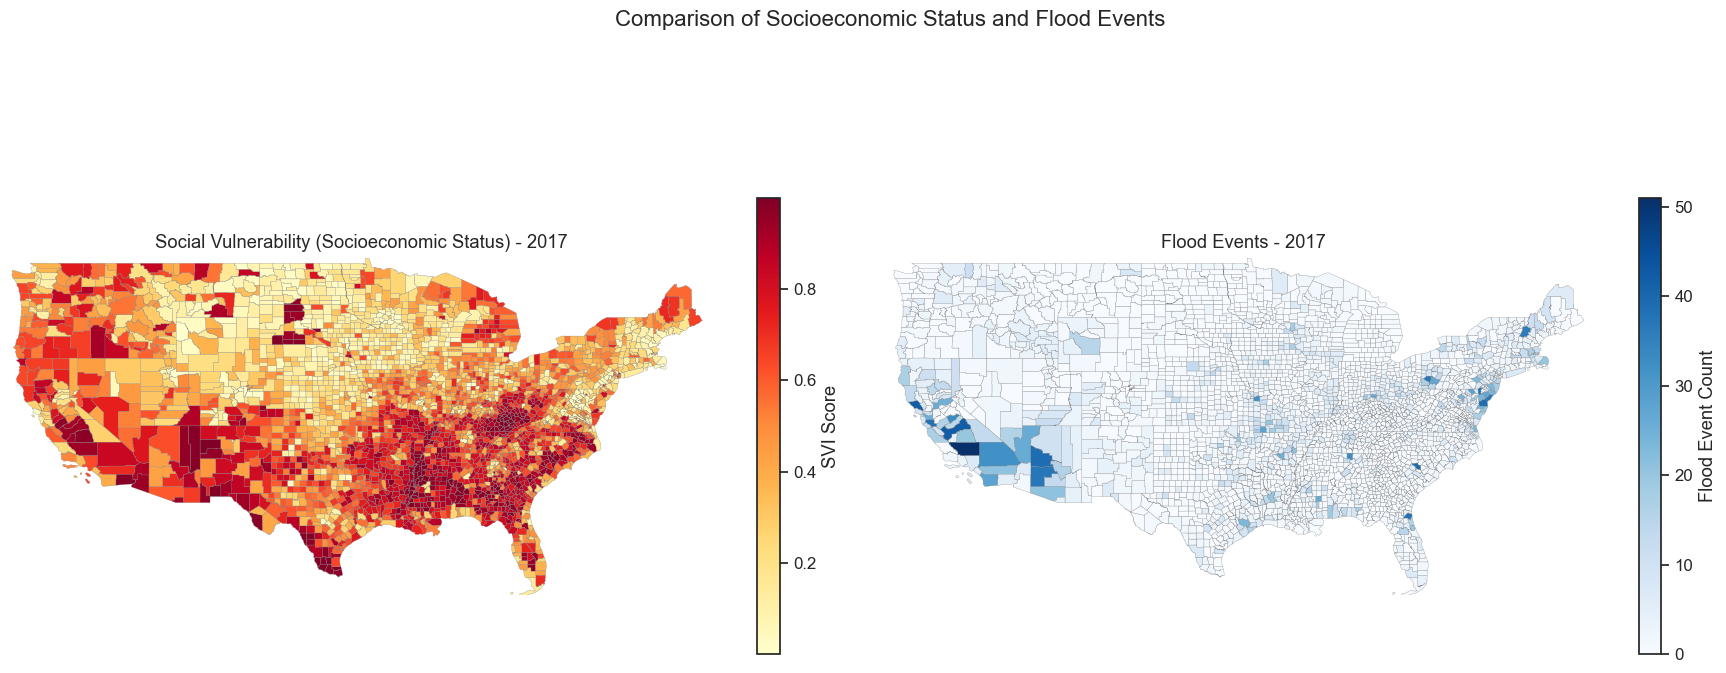

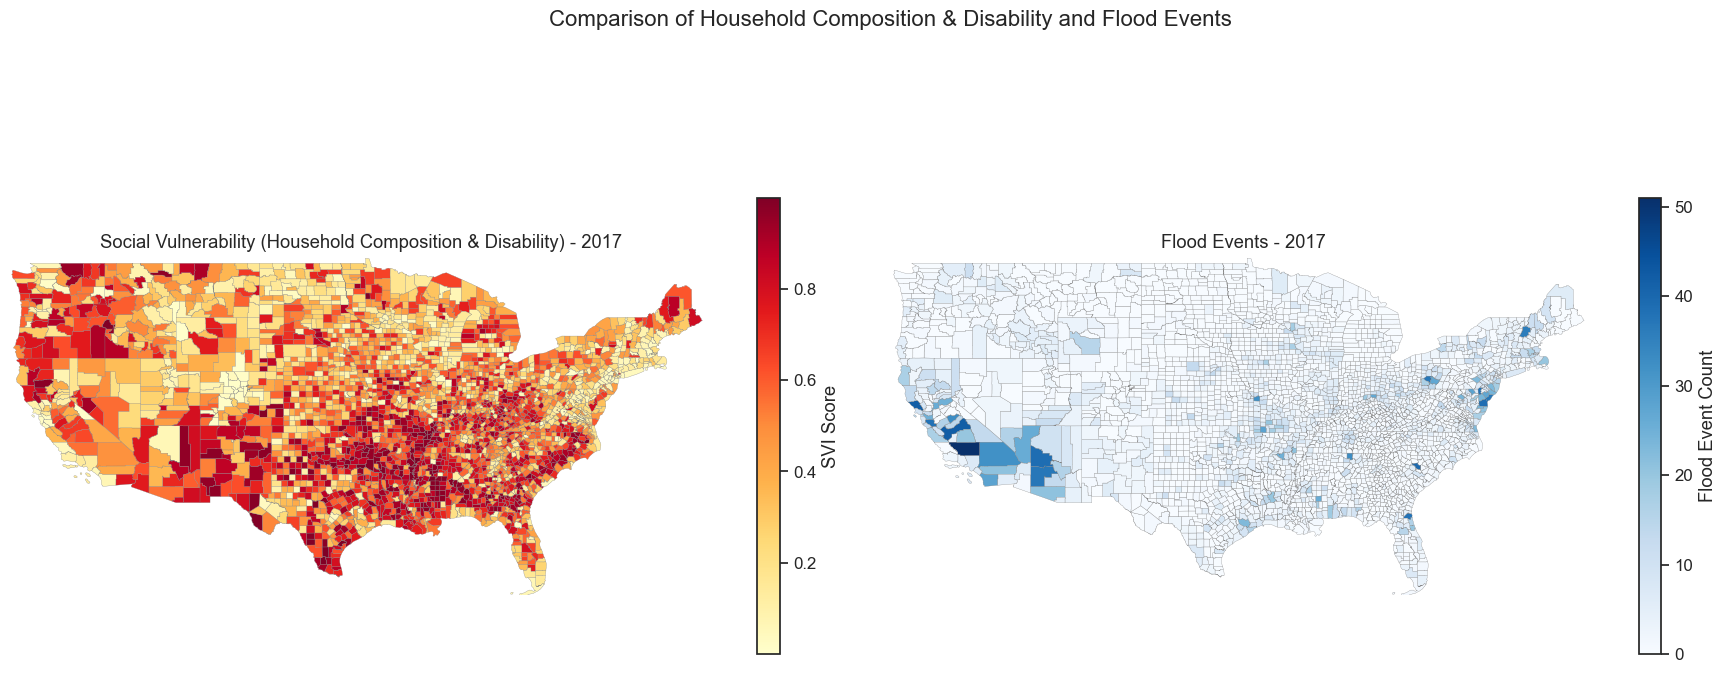

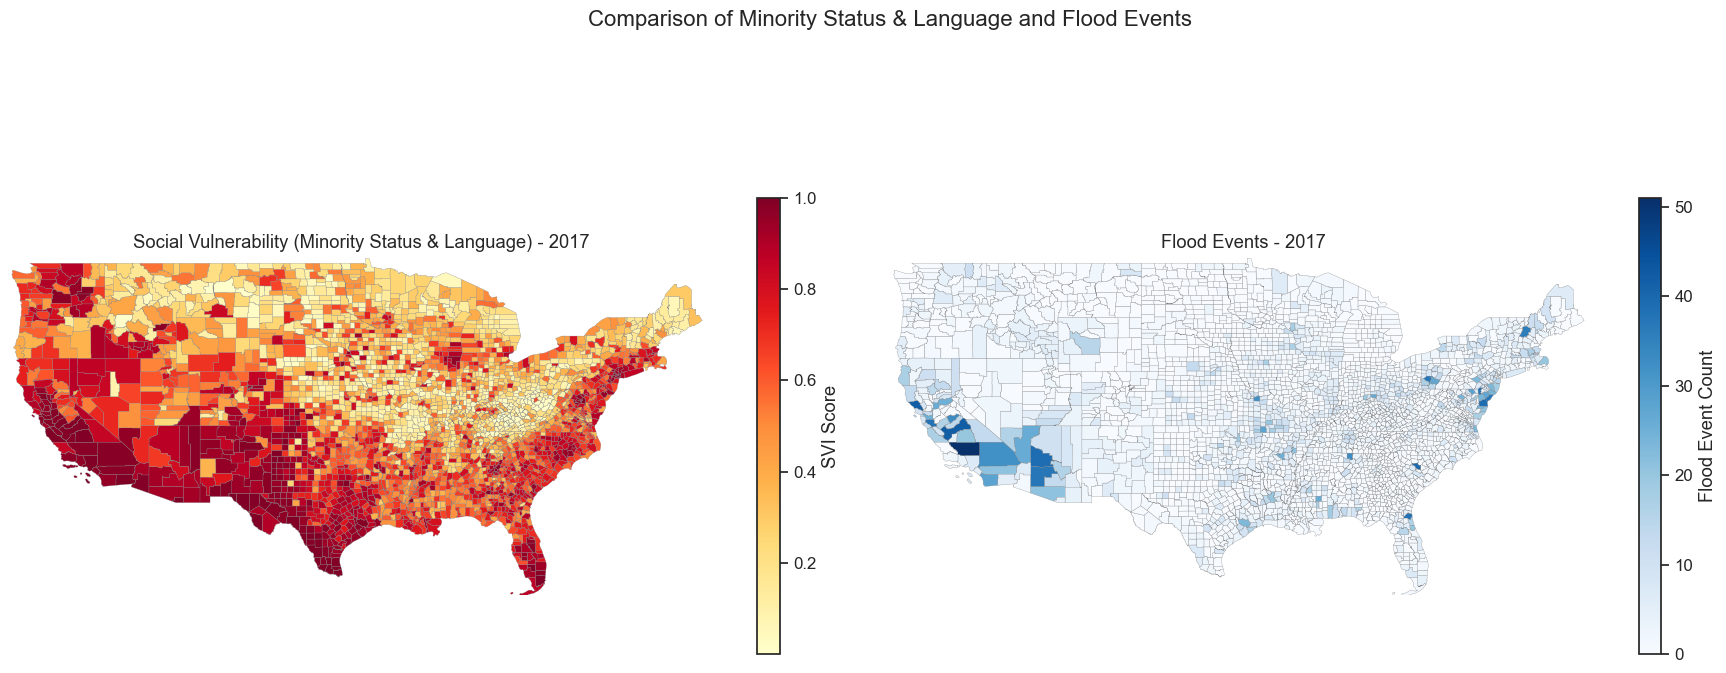

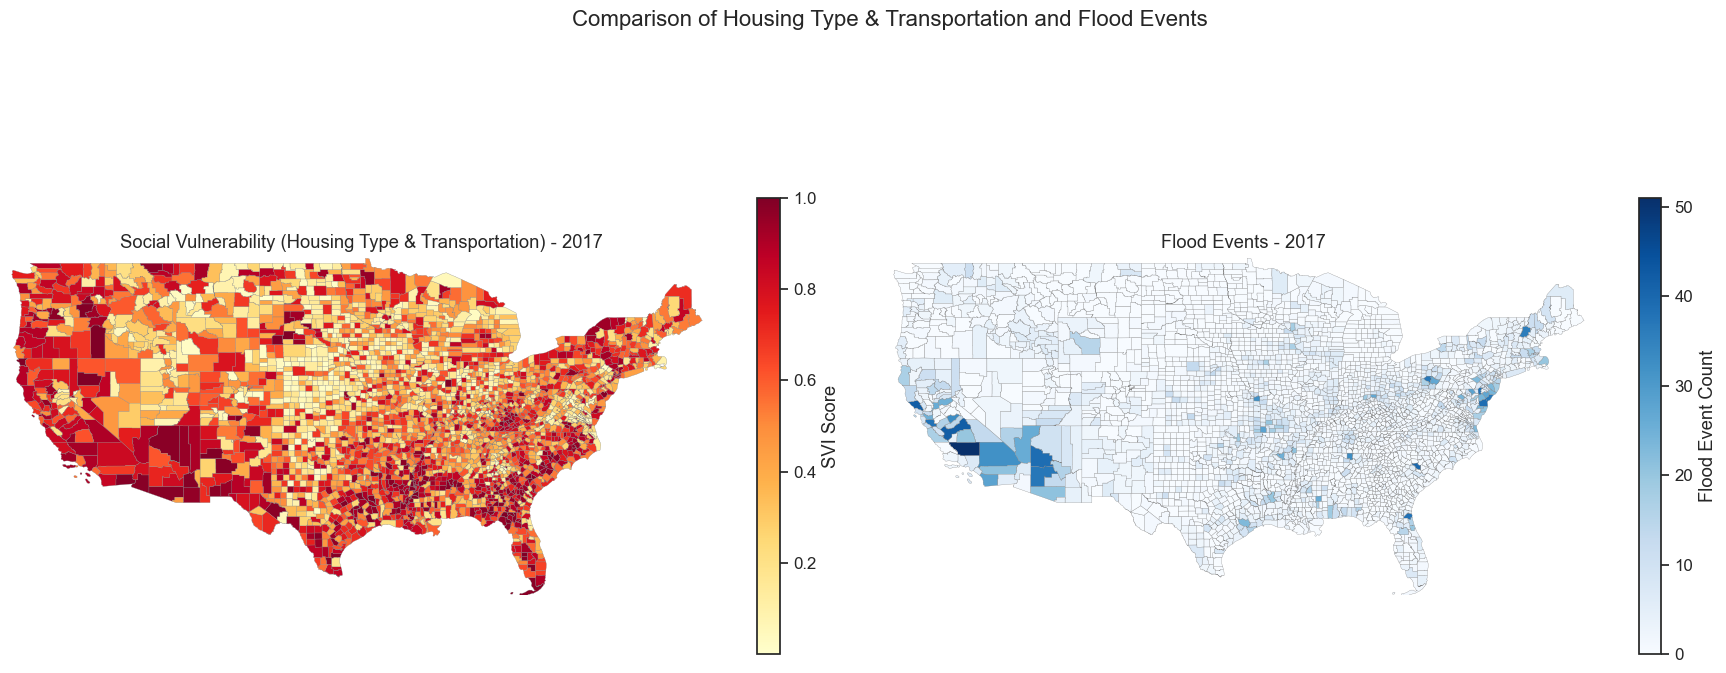

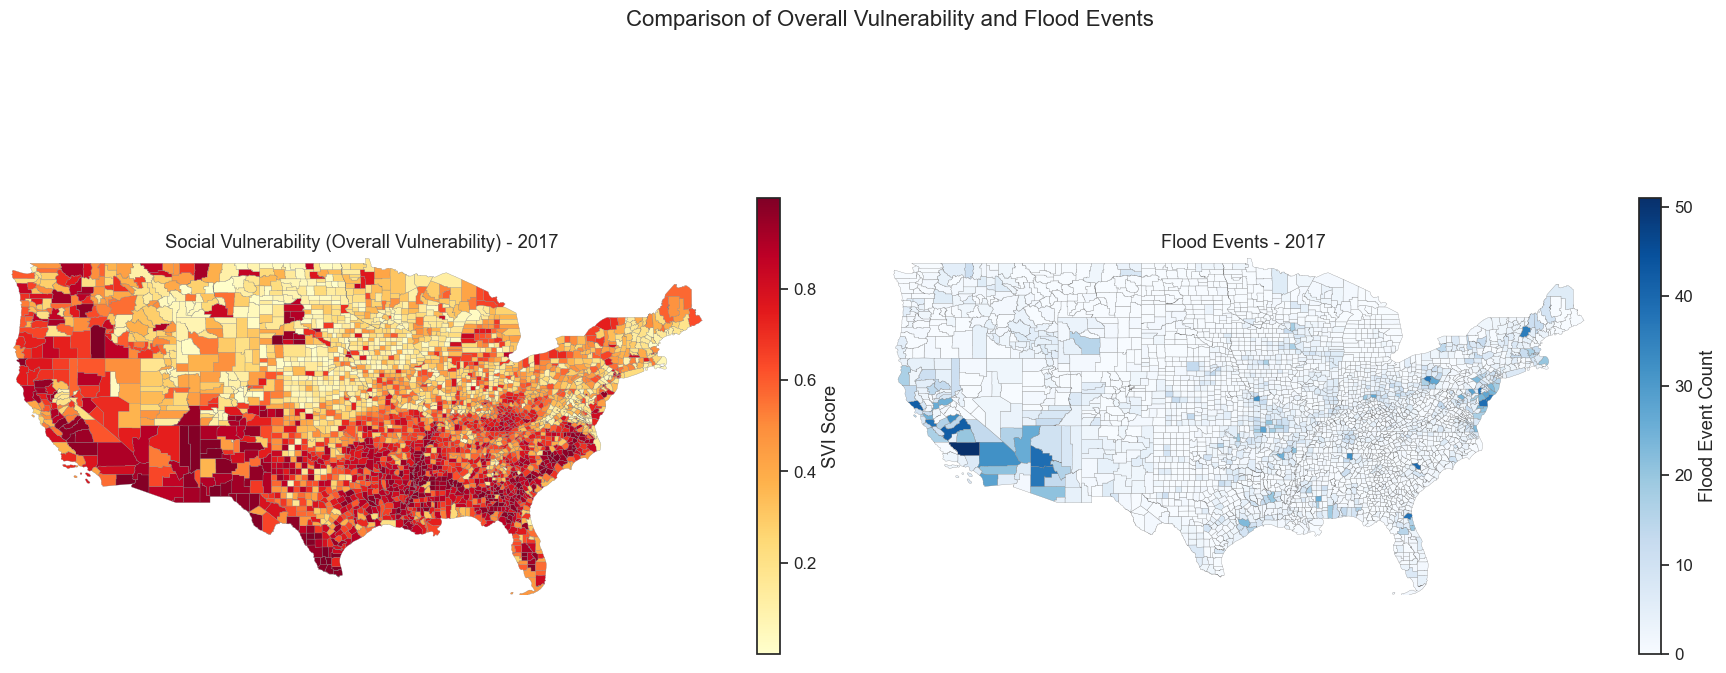

In [71]:
# Define theme components and their descriptions
themes = {
    'RPL_THEME1': 'Socioeconomic Status',
    'RPL_THEME2': 'Household Composition & Disability',
    'RPL_THEME3': 'Minority Status & Language',
    'RPL_THEME4': 'Housing Type & Transportation',
    'RPL_THEMES': 'Overall Vulnerability'
}

# Set up county data (same as before)
county_path = os.path.join(root_path, 'data/tl_2019_us_county/tl_2019_us_county.shp')
counties = gpd.read_file(county_path)
counties['FIPS'] = counties['GEOID'].astype(str).str.zfill(5)
CONUS_BBOX = (-125, 24.5, -66, 49.5)

# For a specific year (e.g., 2018)
year_to_map = 2017
year_data = combined_data[combined_data['Year'] == year_to_map]

# Merge with shapefile
counties_with_data = counties.merge(
    year_data,
    on='FIPS',
    how='left'
)

# Loop through each theme and create a separate figure
for theme, description in themes.items():
    # Create a two-panel figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # First panel: SVI theme
    counties_with_data.plot(
        column=theme,
        cmap='YlOrRd',
        linewidth=0.2,
        edgecolor='gray',
        legend=True,
        ax=axes[0],
        legend_kwds={'shrink': 0.6, 'label': 'SVI Score'}
    )
    axes[0].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
    axes[0].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
    axes[0].set_title(f'Social Vulnerability ({description}) - {year_to_map}')
    axes[0].set_axis_off()
    
    # Second panel: Flood events
    counties_with_data.plot(
        column='total_flood_events',
        cmap='Blues',
        linewidth=0.2,
        edgecolor='gray',
        legend=True,
        ax=axes[1],
        legend_kwds={'shrink': 0.6, 'label': 'Flood Event Count'}
    )
    axes[1].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
    axes[1].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
    axes[1].set_title(f'Flood Events - {year_to_map}')
    axes[1].set_axis_off()
    
    plt.tight_layout()
    plt.suptitle(f'Comparison of {description} and Flood Events', fontsize=16, y=1.02)
    plt.show()


In [72]:
# Define damage columns to aggregate from your NOAA data
damage_cols = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS']

# Ensure damage columns are numeric (they're often stored as strings with K, M, B suffixes)
def convert_damage_value(value):
    if pd.isna(value) or value == 0:
        return 0
    try:
        if isinstance(value, str):
            if value.endswith('K'):
                return float(value[:-1]) * 1_000
            elif value.endswith('M'):
                return float(value[:-1]) * 1_000_000
            elif value.endswith('B'):
                return float(value[:-1]) * 1_000_000_000
            else:
                return float(value)
        return value
    except:
        return 0

# Apply conversion to damage columns
for col in damage_cols:
    df_noaa[col] = df_noaa[col].apply(convert_damage_value)

# Filter for your selected flood event types 
selected_events = ['Flash Flood', 'Flood', 'Heavy Rain']
flood_data = df_noaa[df_noaa['EVENT_TYPE'].isin(selected_events)]

# Make sure FIPS is properly formatted
flood_data['FIPS'] = flood_data['STATE_FIPS'] + flood_data['CZ_FIPS']
flood_data['FIPS'] = flood_data['FIPS'].astype(str).str.zfill(5)

# Aggregate damages by county and year
damage_agg = flood_data.groupby(['FIPS', 'YEAR'])[damage_cols].sum().reset_index()
damage_agg = damage_agg.rename(columns={'YEAR': 'Year'})

# Create a total damage column
damage_agg['TOTAL_DAMAGE'] = damage_agg['DAMAGE_PROPERTY'] + damage_agg['DAMAGE_CROPS']


/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/1760952019.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data['FIPS'] = flood_data['STATE_FIPS'] + flood_data['CZ_FIPS']
/var/folders/p3/9thmbny930lcn8vcx6g216br0000gp/T/ipykernel_48734/1760952019.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data['FIPS'] = flood_data['FIPS'].astype(str).str.zfill(5)


In [83]:
# For your target year (2017)
year_to_map = 2017

# Filter damage data for your target year
year_damage = damage_agg[damage_agg['Year'] == year_to_map]

# Merge with SVI data for the same year
year_data = combined_data[combined_data['Year'] == year_to_map]
year_data = pd.merge(year_data, year_damage, on=['FIPS', 'Year'], how='left')

# Fill missing damages with zero
damage_cols_extended = damage_cols + ['TOTAL_DAMAGE']
year_data[damage_cols_extended] = year_data[damage_cols_extended].fillna(0)

# Merge with county shapefile
counties_with_data = counties.merge(
    year_data,
    on='FIPS',
    how='left'
)


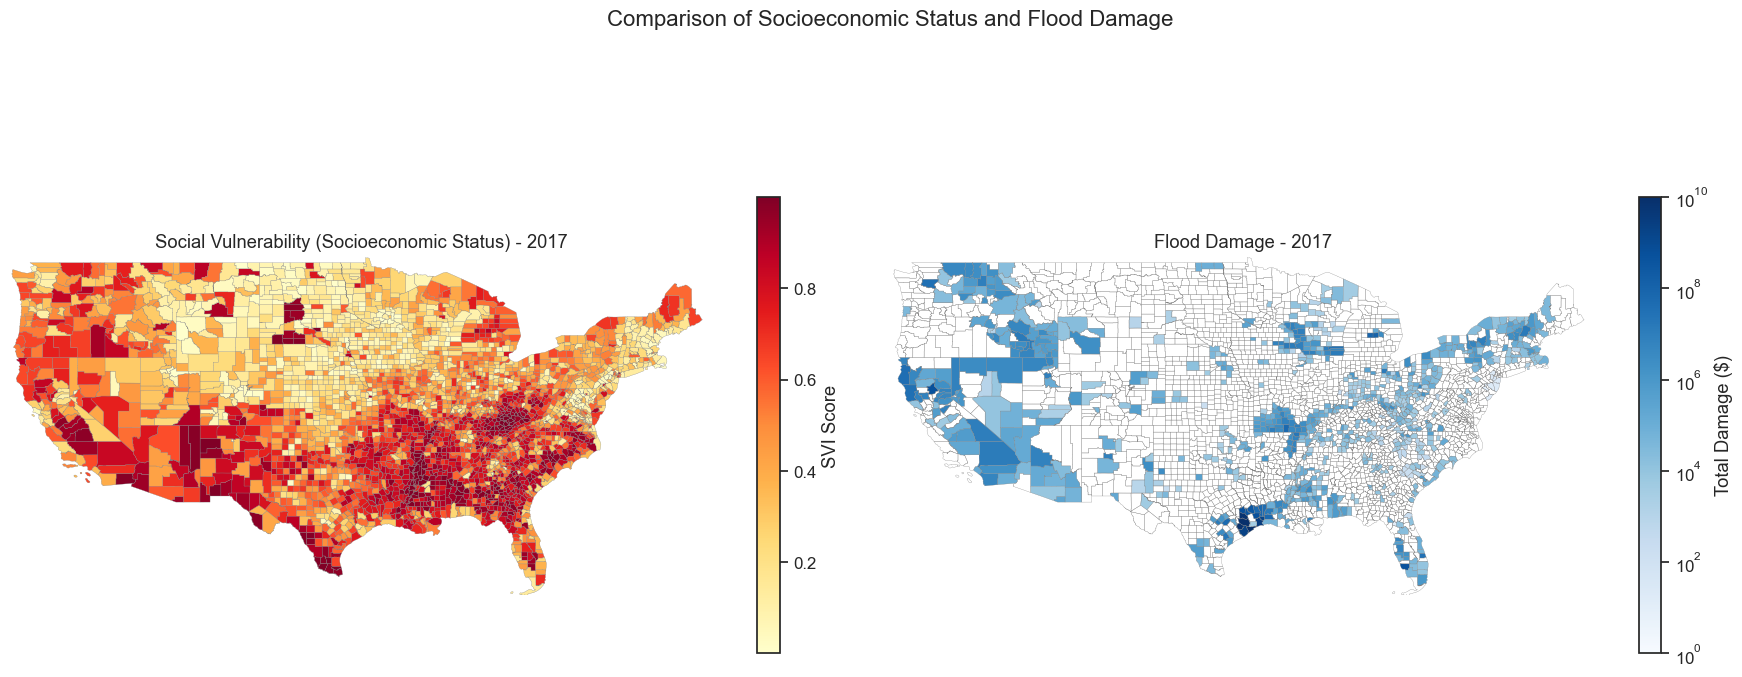

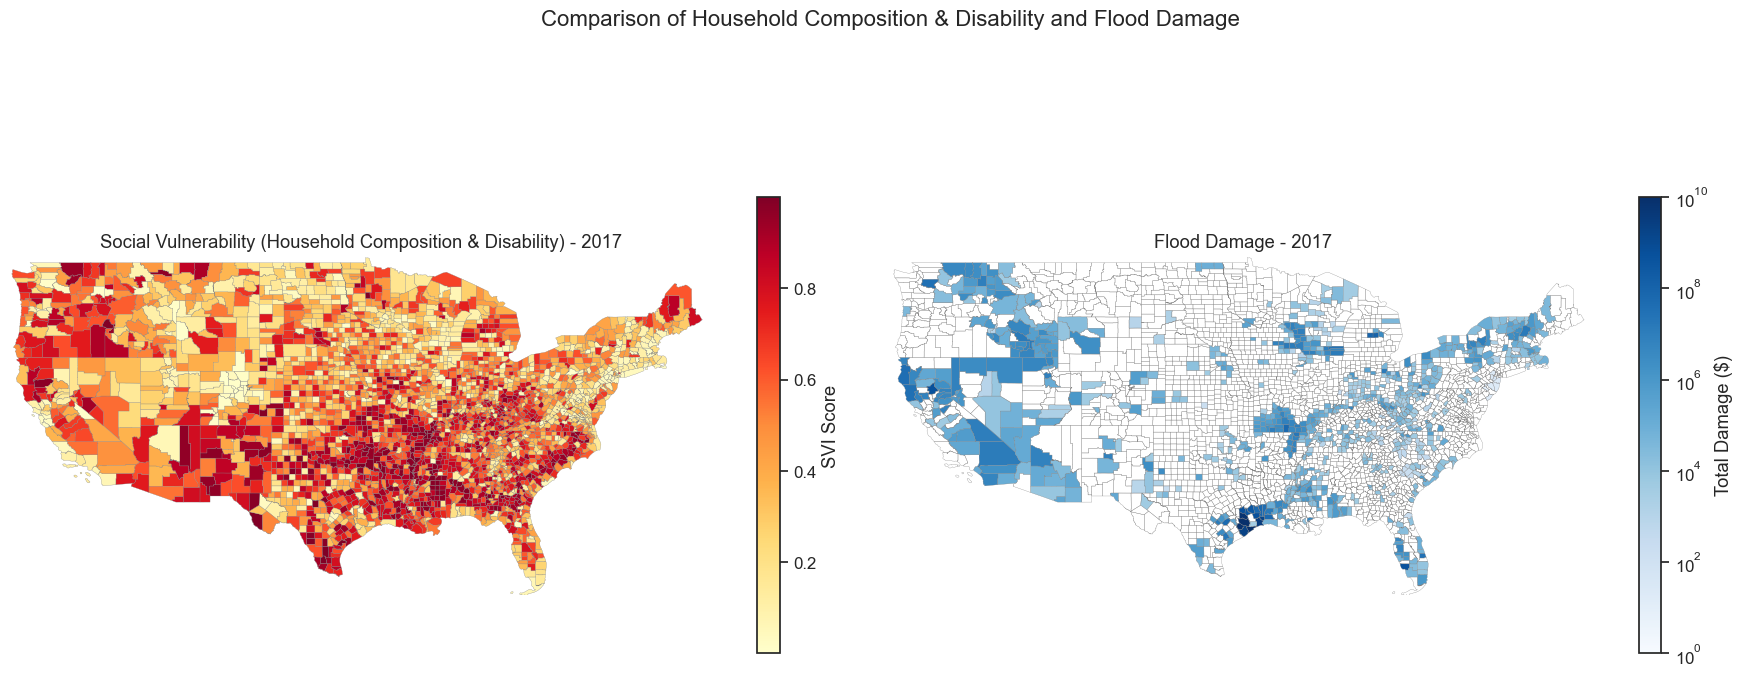

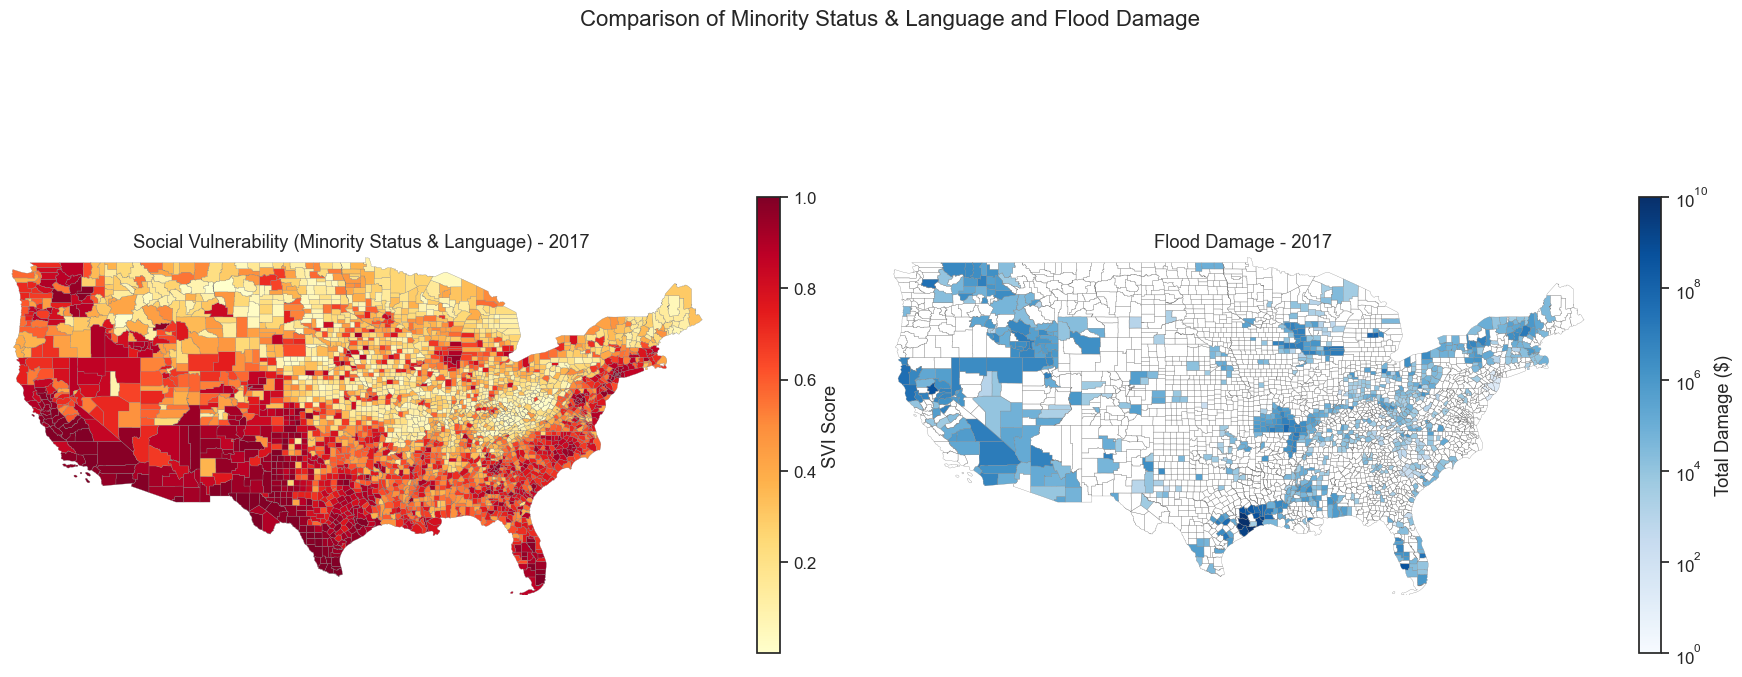

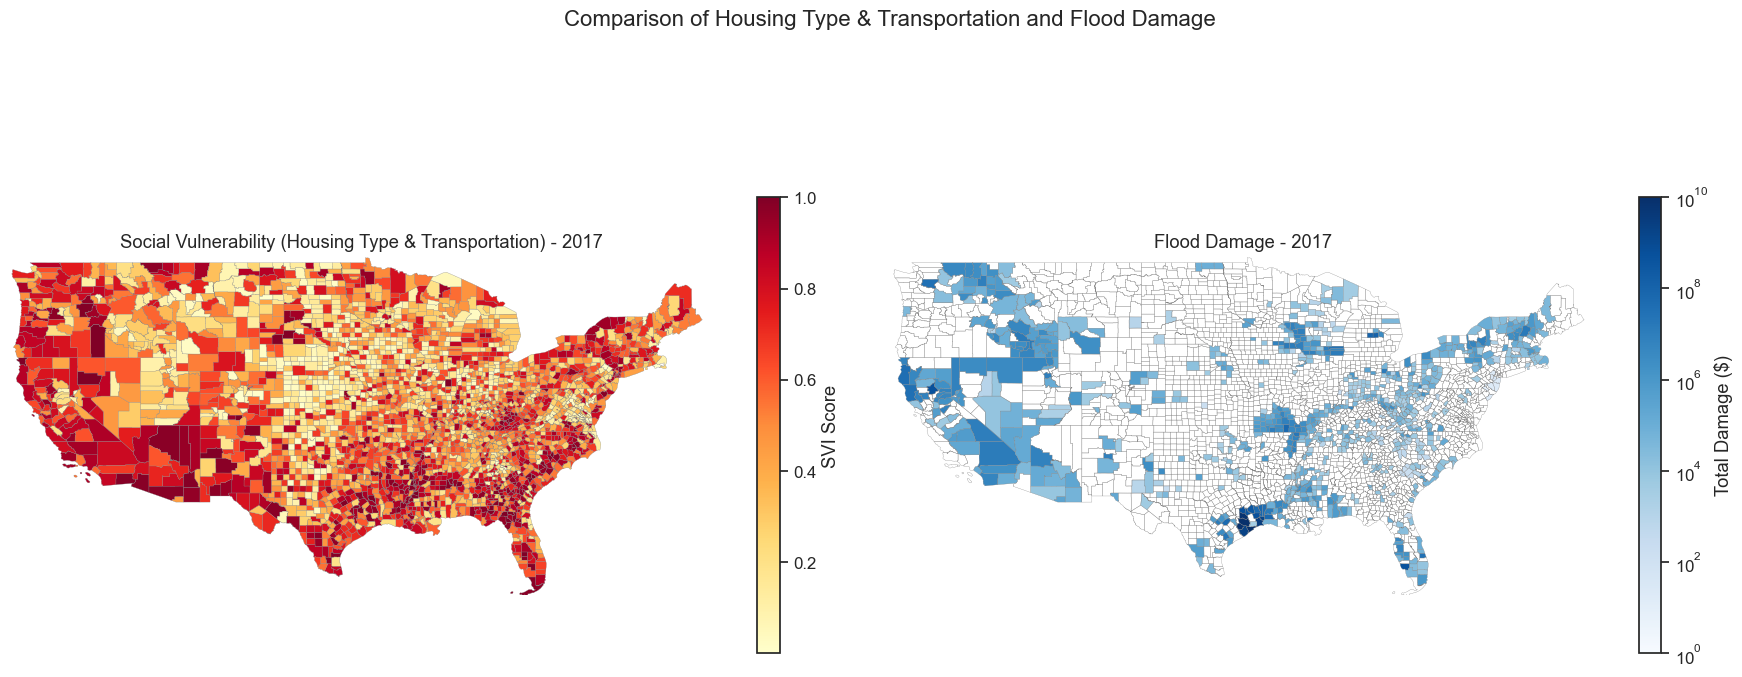

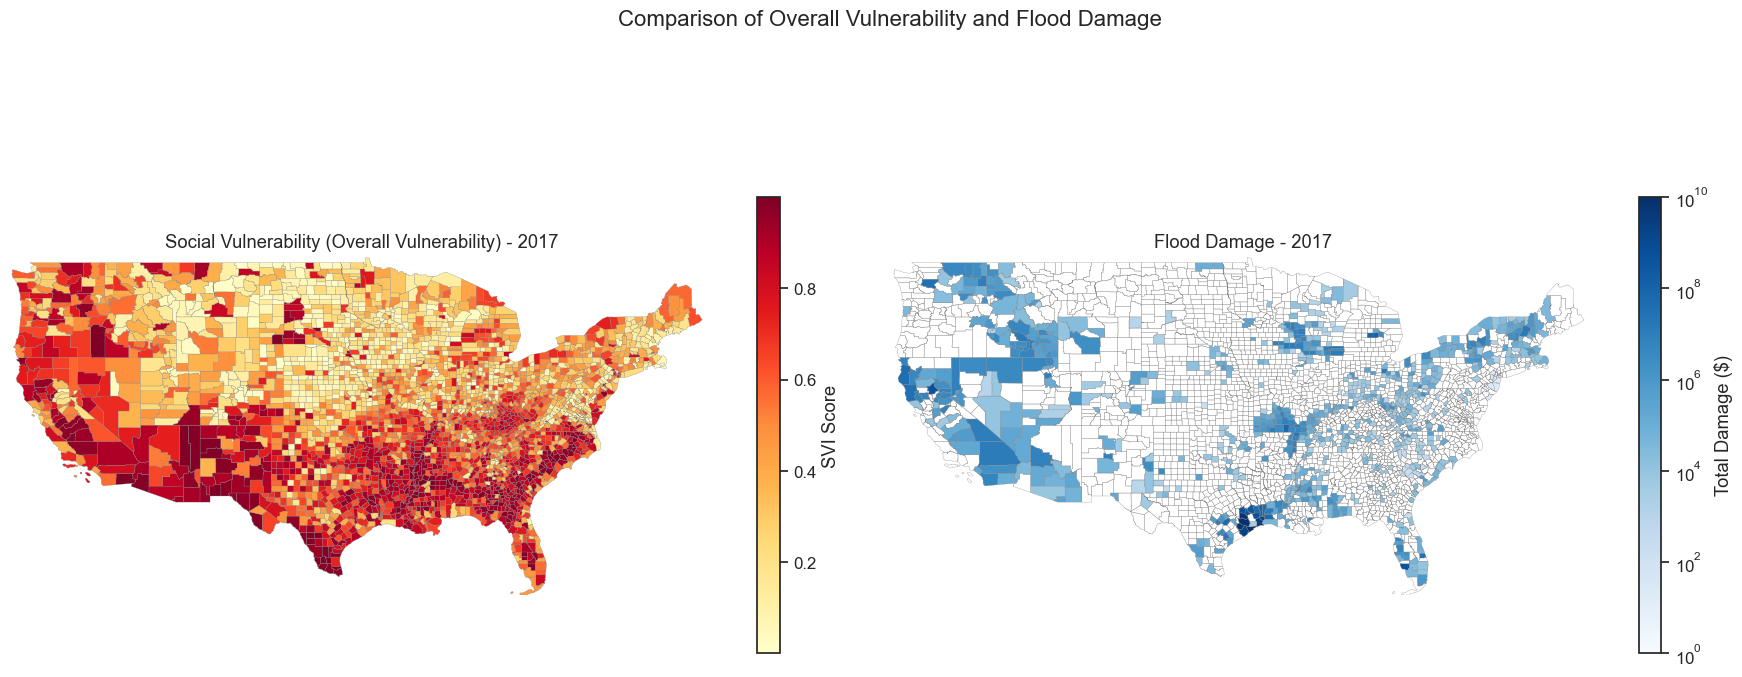

In [84]:
import matplotlib.colors as colors  # <-- Add this line
# Loop through each theme and create a separate figure with total damage
for theme, description in themes.items():
    # Create a two-panel figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # First panel: SVI theme
    counties_with_data.plot(
        column=theme,
        cmap='YlOrRd',
        linewidth=0.2,
        edgecolor='gray',
        legend=True,
        ax=axes[0],
        legend_kwds={'shrink': 0.6, 'label': 'SVI Score'}
    )
    axes[0].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
    axes[0].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
    axes[0].set_title(f'Social Vulnerability ({description}) - {year_to_map}')
    axes[0].set_axis_off()
    
    # Second panel: Total damage
    log_norm = colors.LogNorm(  # Use colors.LogNorm instead of matplotlib.colors.LogNorm
        vmin=1, 
        vmax=counties_with_data['TOTAL_DAMAGE'].max() + 1
    )
    
    counties_with_data.plot(
        column='TOTAL_DAMAGE',
        cmap='Blues',
        linewidth=0.2,
        edgecolor='gray',
        legend=True,
        ax=axes[1],
        norm=log_norm,
        legend_kwds={'shrink': 0.6, 'label': 'Total Damage ($)'}
    )
    axes[1].set_xlim(CONUS_BBOX[0], CONUS_BBOX[2])
    axes[1].set_ylim(CONUS_BBOX[1], CONUS_BBOX[3])
    axes[1].set_title(f'Flood Damage - {year_to_map}')
    axes[1].set_axis_off()
    
    plt.tight_layout()
    plt.suptitle(f'Comparison of {description} and Flood Damage', fontsize=16, y=1.02)
    plt.show()
